In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Check GPU on your computer

In [2]:
import warnings
# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/anaconda3/envs/fastcampus/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: No GPU found. Please use a GPU to train your neural network.
  after removing the cwd from sys.path.


In [3]:
# Data Load
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

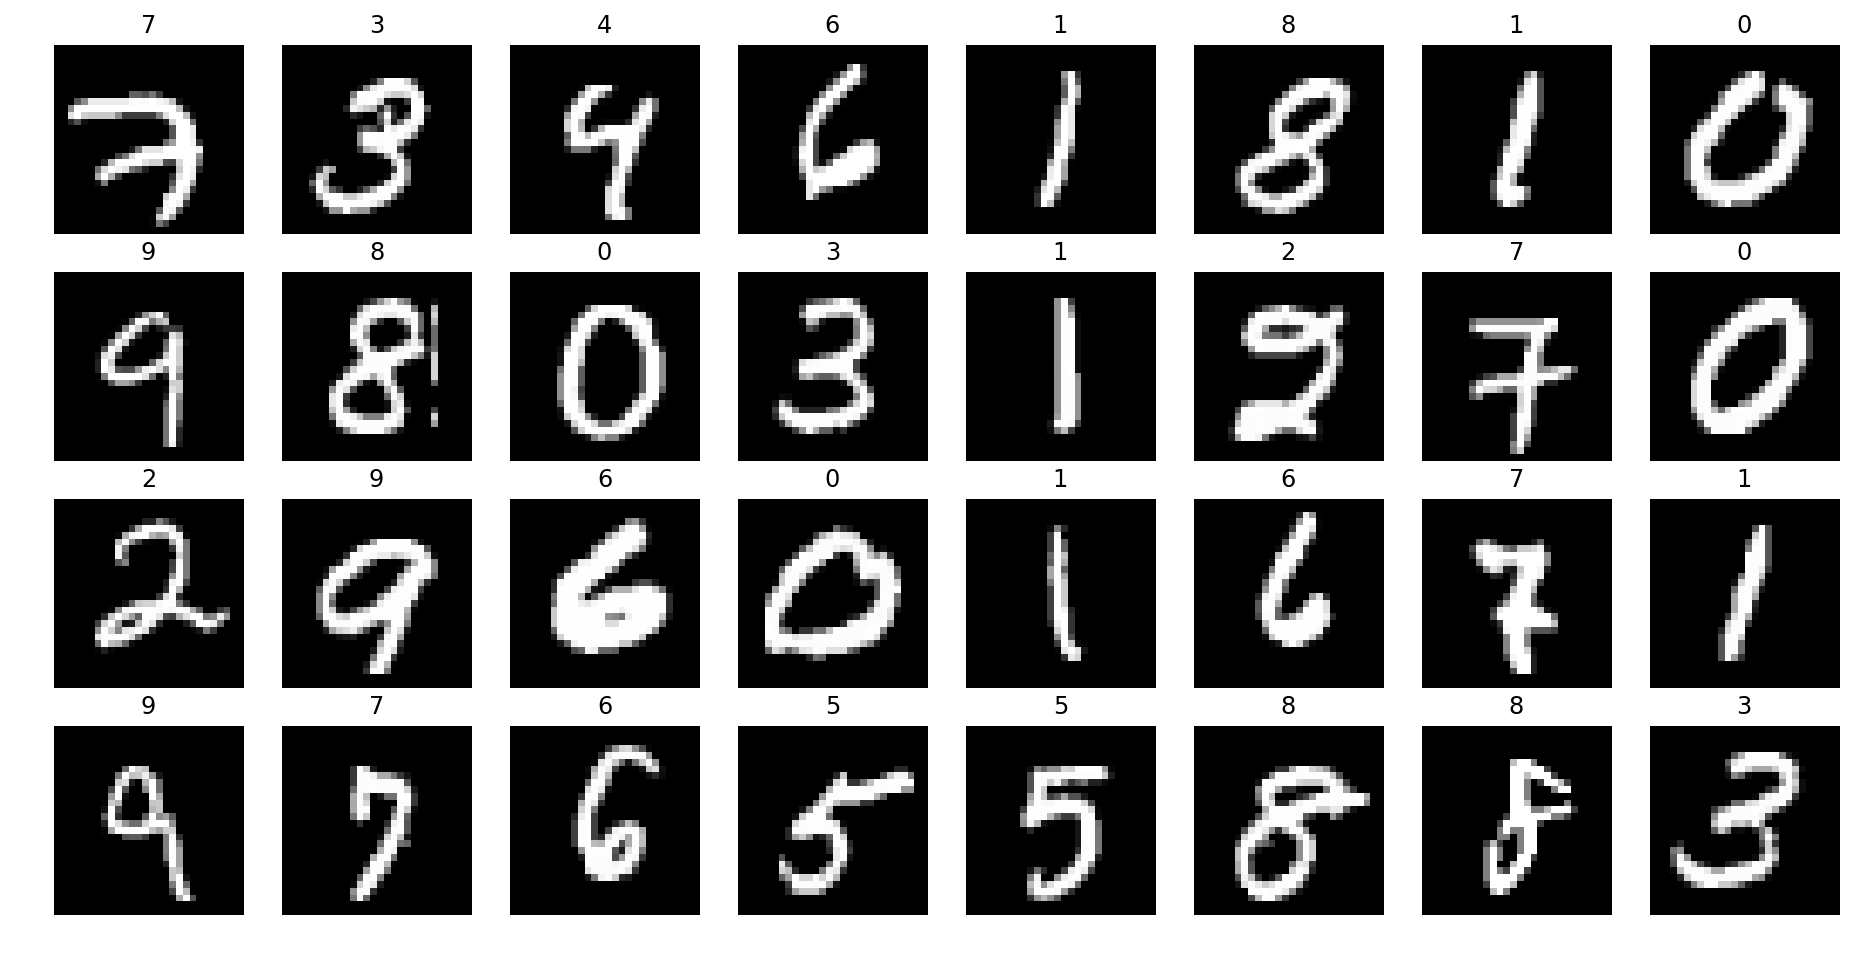

In [4]:
plt.figure(figsize=(16,8))
for k in range(32):
    img = mnist.train.images[k].reshape(28,28)
    label = np.argmax(mnist.train.labels[k])
    plt.subplot(4,8,1+k)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
plt.show()

In [5]:
print(mnist.train.images.shape)
features = mnist.train.images
labels = mnist.train.labels

(55000, 784)


In [6]:
theimage = mnist.train.images[:1]

### 02. CNN Model TensorFlow로 정의하기

- TODO1 : `features`를 `feed`할 placeholder(`x`)를 정의
- TODO2 : CNN의 2번째 Layer를 완성하세요.
    1. `filter size` : `3`
    1. `channels` : `32`
    1. `activation` : ReLU

In [7]:
# TODO1
x = tf.placeholder(tf.float32, [None, 784])


x_img = tf.reshape(x, shape=[-1, 28, 28, 1])
conv1 = tf.layers.conv2d(x_img, 64, 5, activation=tf.nn.relu)
print(conv1)
conv1 = tf.layers.max_pooling2d(conv1, 2, 2)
print(conv1)

# TODO2
conv2 = tf.layers.conv2d(conv1, 32, 3, activation=tf.nn.relu)
print(conv2)
conv2 = tf.layers.max_pooling2d(conv2, 2, 2)
print(conv2)

fc1 = tf.contrib.layers.flatten(conv2)
print(fc1)
fc1 = tf.layers.dense(fc1, 1024)
print(fc1)

model = tf.nn.softmax(tf.layers.dense(fc1, 10))
print(model)

Tensor("conv2d/Relu:0", shape=(?, 24, 24, 64), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 12, 12, 64), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 10, 10, 32), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 5, 5, 32), dtype=float32)
Tensor("Flatten/Reshape:0", shape=(?, 800), dtype=float32)
Tensor("dense/BiasAdd:0", shape=(?, 1024), dtype=float32)
Tensor("Softmax:0", shape=(?, 10), dtype=float32)


### 03. Cross-Entropy 정의하기

- TODO3 : `labels`를 `feed`할 `placeholder`(`y`) 정의하기
- TODO4 : Corss-Entropy(`loss`) 정의하기 : `tf.

$$
\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{10} -y_i^k \log(\hat{y_i^k})
$$

In [8]:
# TODO3
y = tf.placeholder(tf.float32, [None, 10])

# TODO4
loss = tf.reduce_mean(tf.reduce_sum(-y * tf.log(model),1))

print(loss)

Tensor("Mean:0", shape=(), dtype=float32)


In [9]:
# For testing accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(model,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### 06. Stochastic Gradient Descent에 사용할 Hyper-Parameter 설정(TODO 5) 
1. Optimizer : `your choice`
1. `batch_size` : `your choice`
1. `lerning rate` : `your choice`
1. `MaxEpoch` : `your choice`

In [10]:
# TODO4
batch_size = 128
lr = 1E-4
MaxEpochs = 10
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

### 07. Stochastic Gradient Descent(SGD)

0 0 2.28733 0.1406
0 50 1.19654 0.761
0 100 0.50652 0.8777
0 150 0.307924 0.9148
0 200 0.204132 0.9239
0 250 0.227218 0.9391
0 300 0.255376 0.9465
0 350 0.20179 0.9465
0 400 0.185432 0.9572


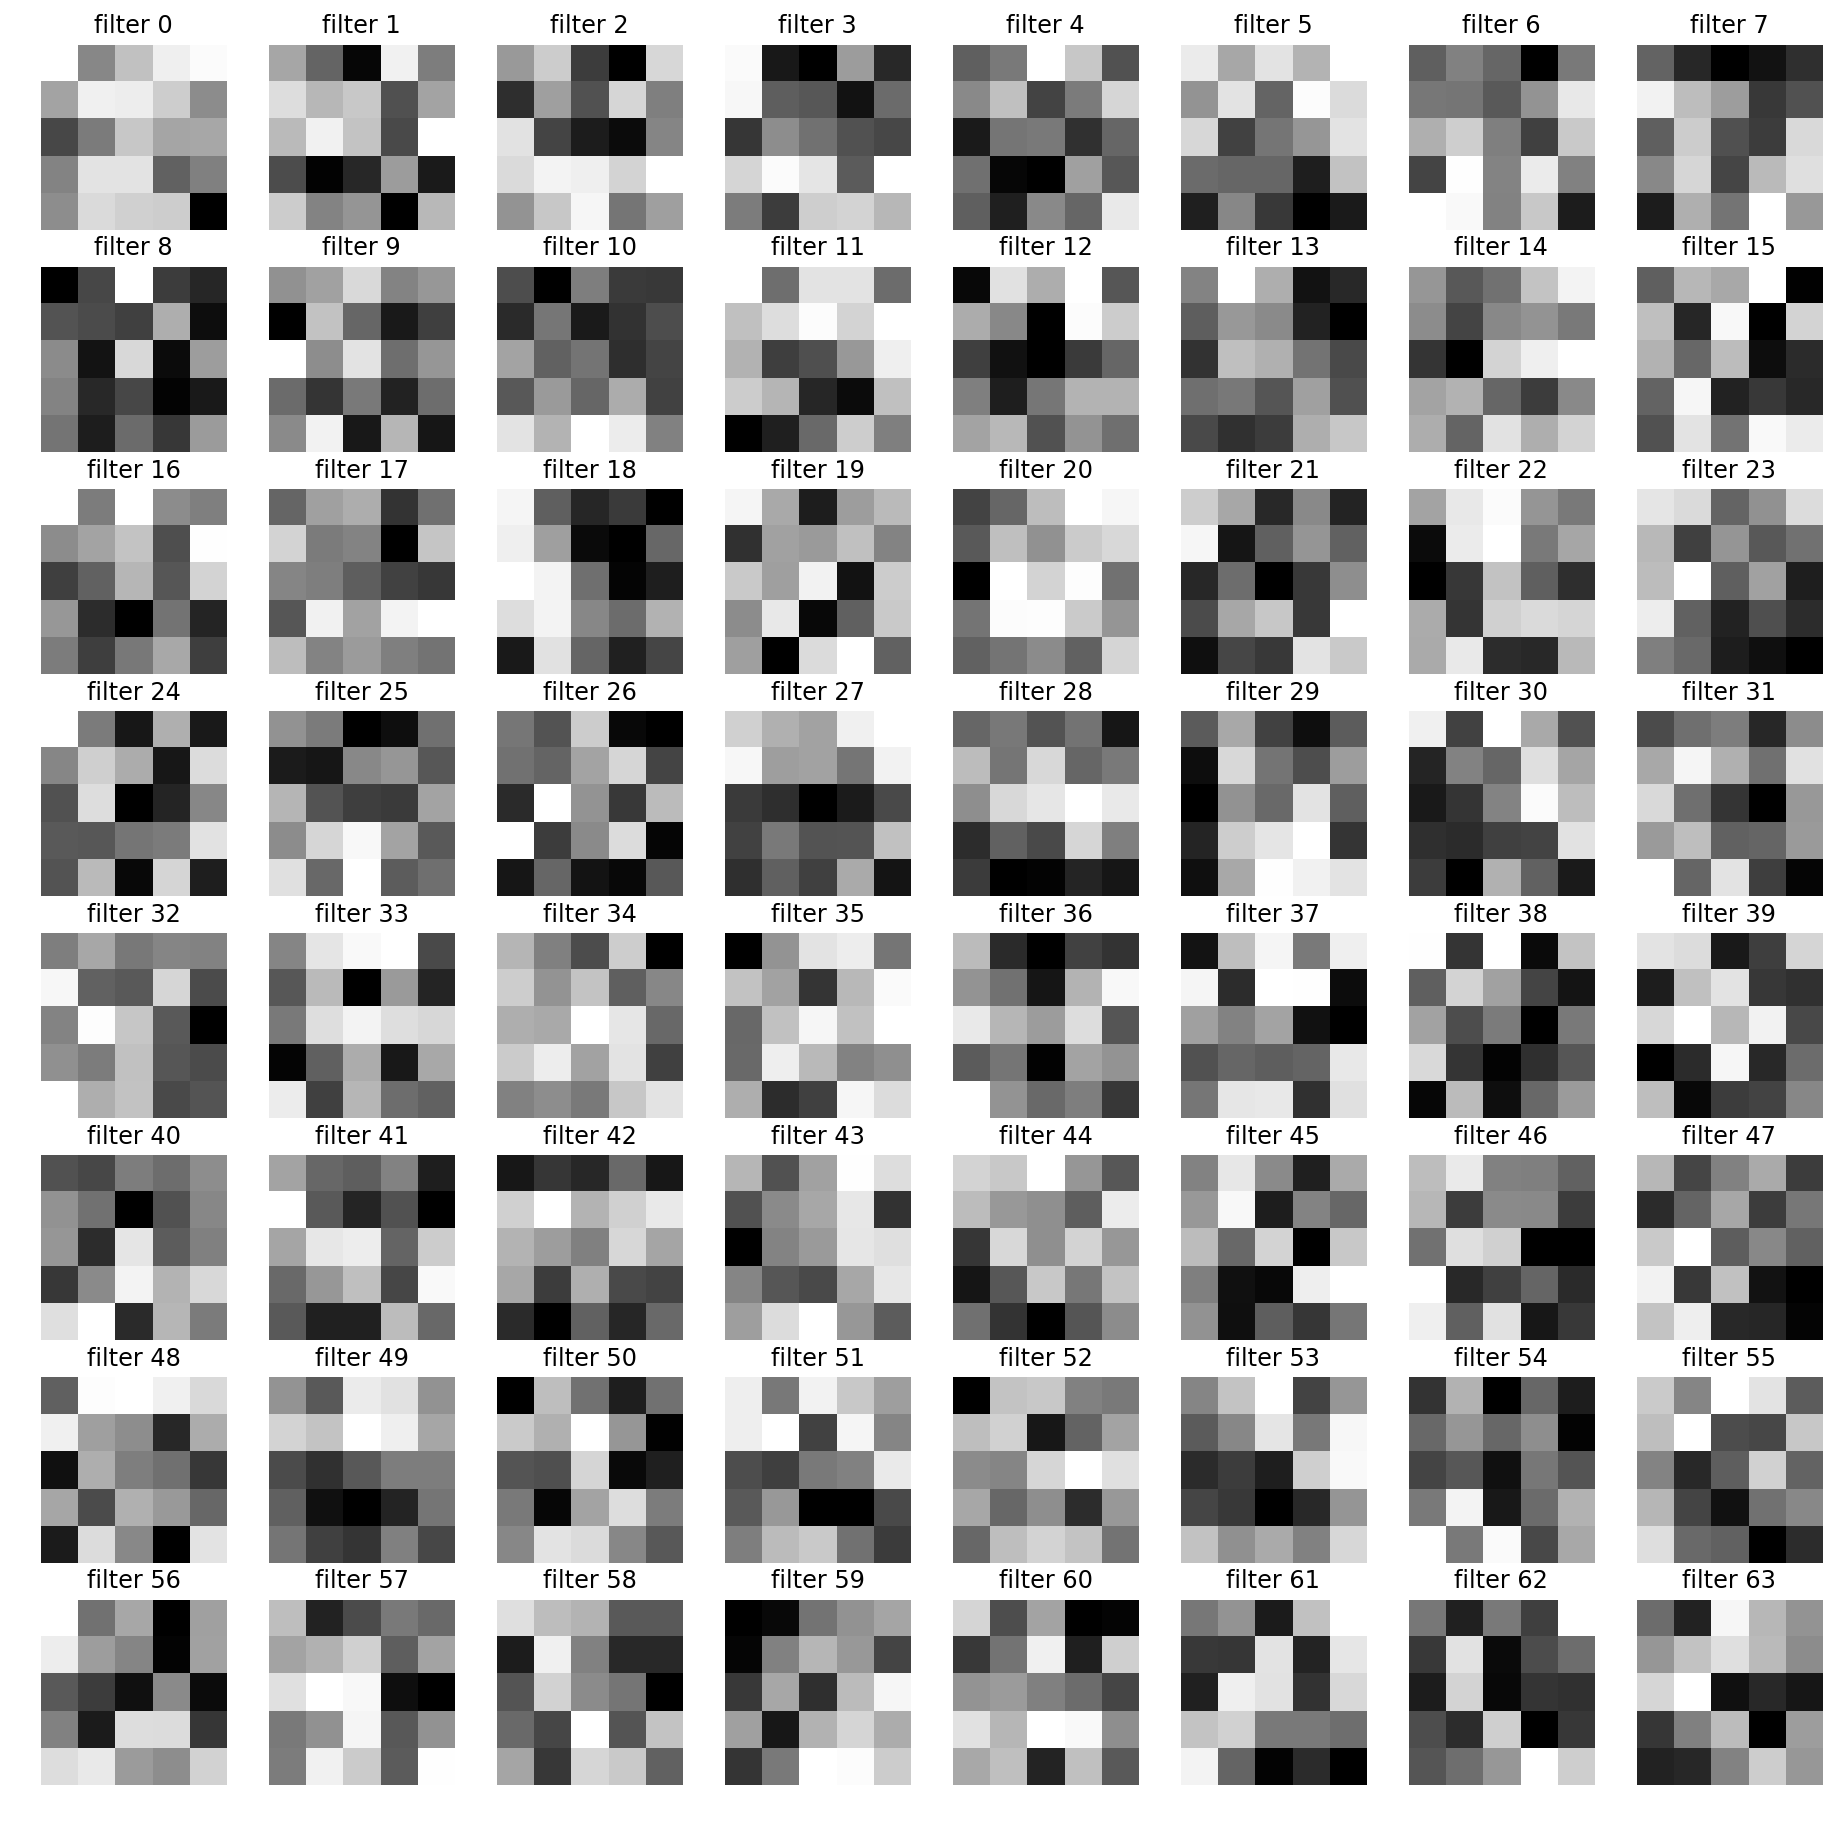

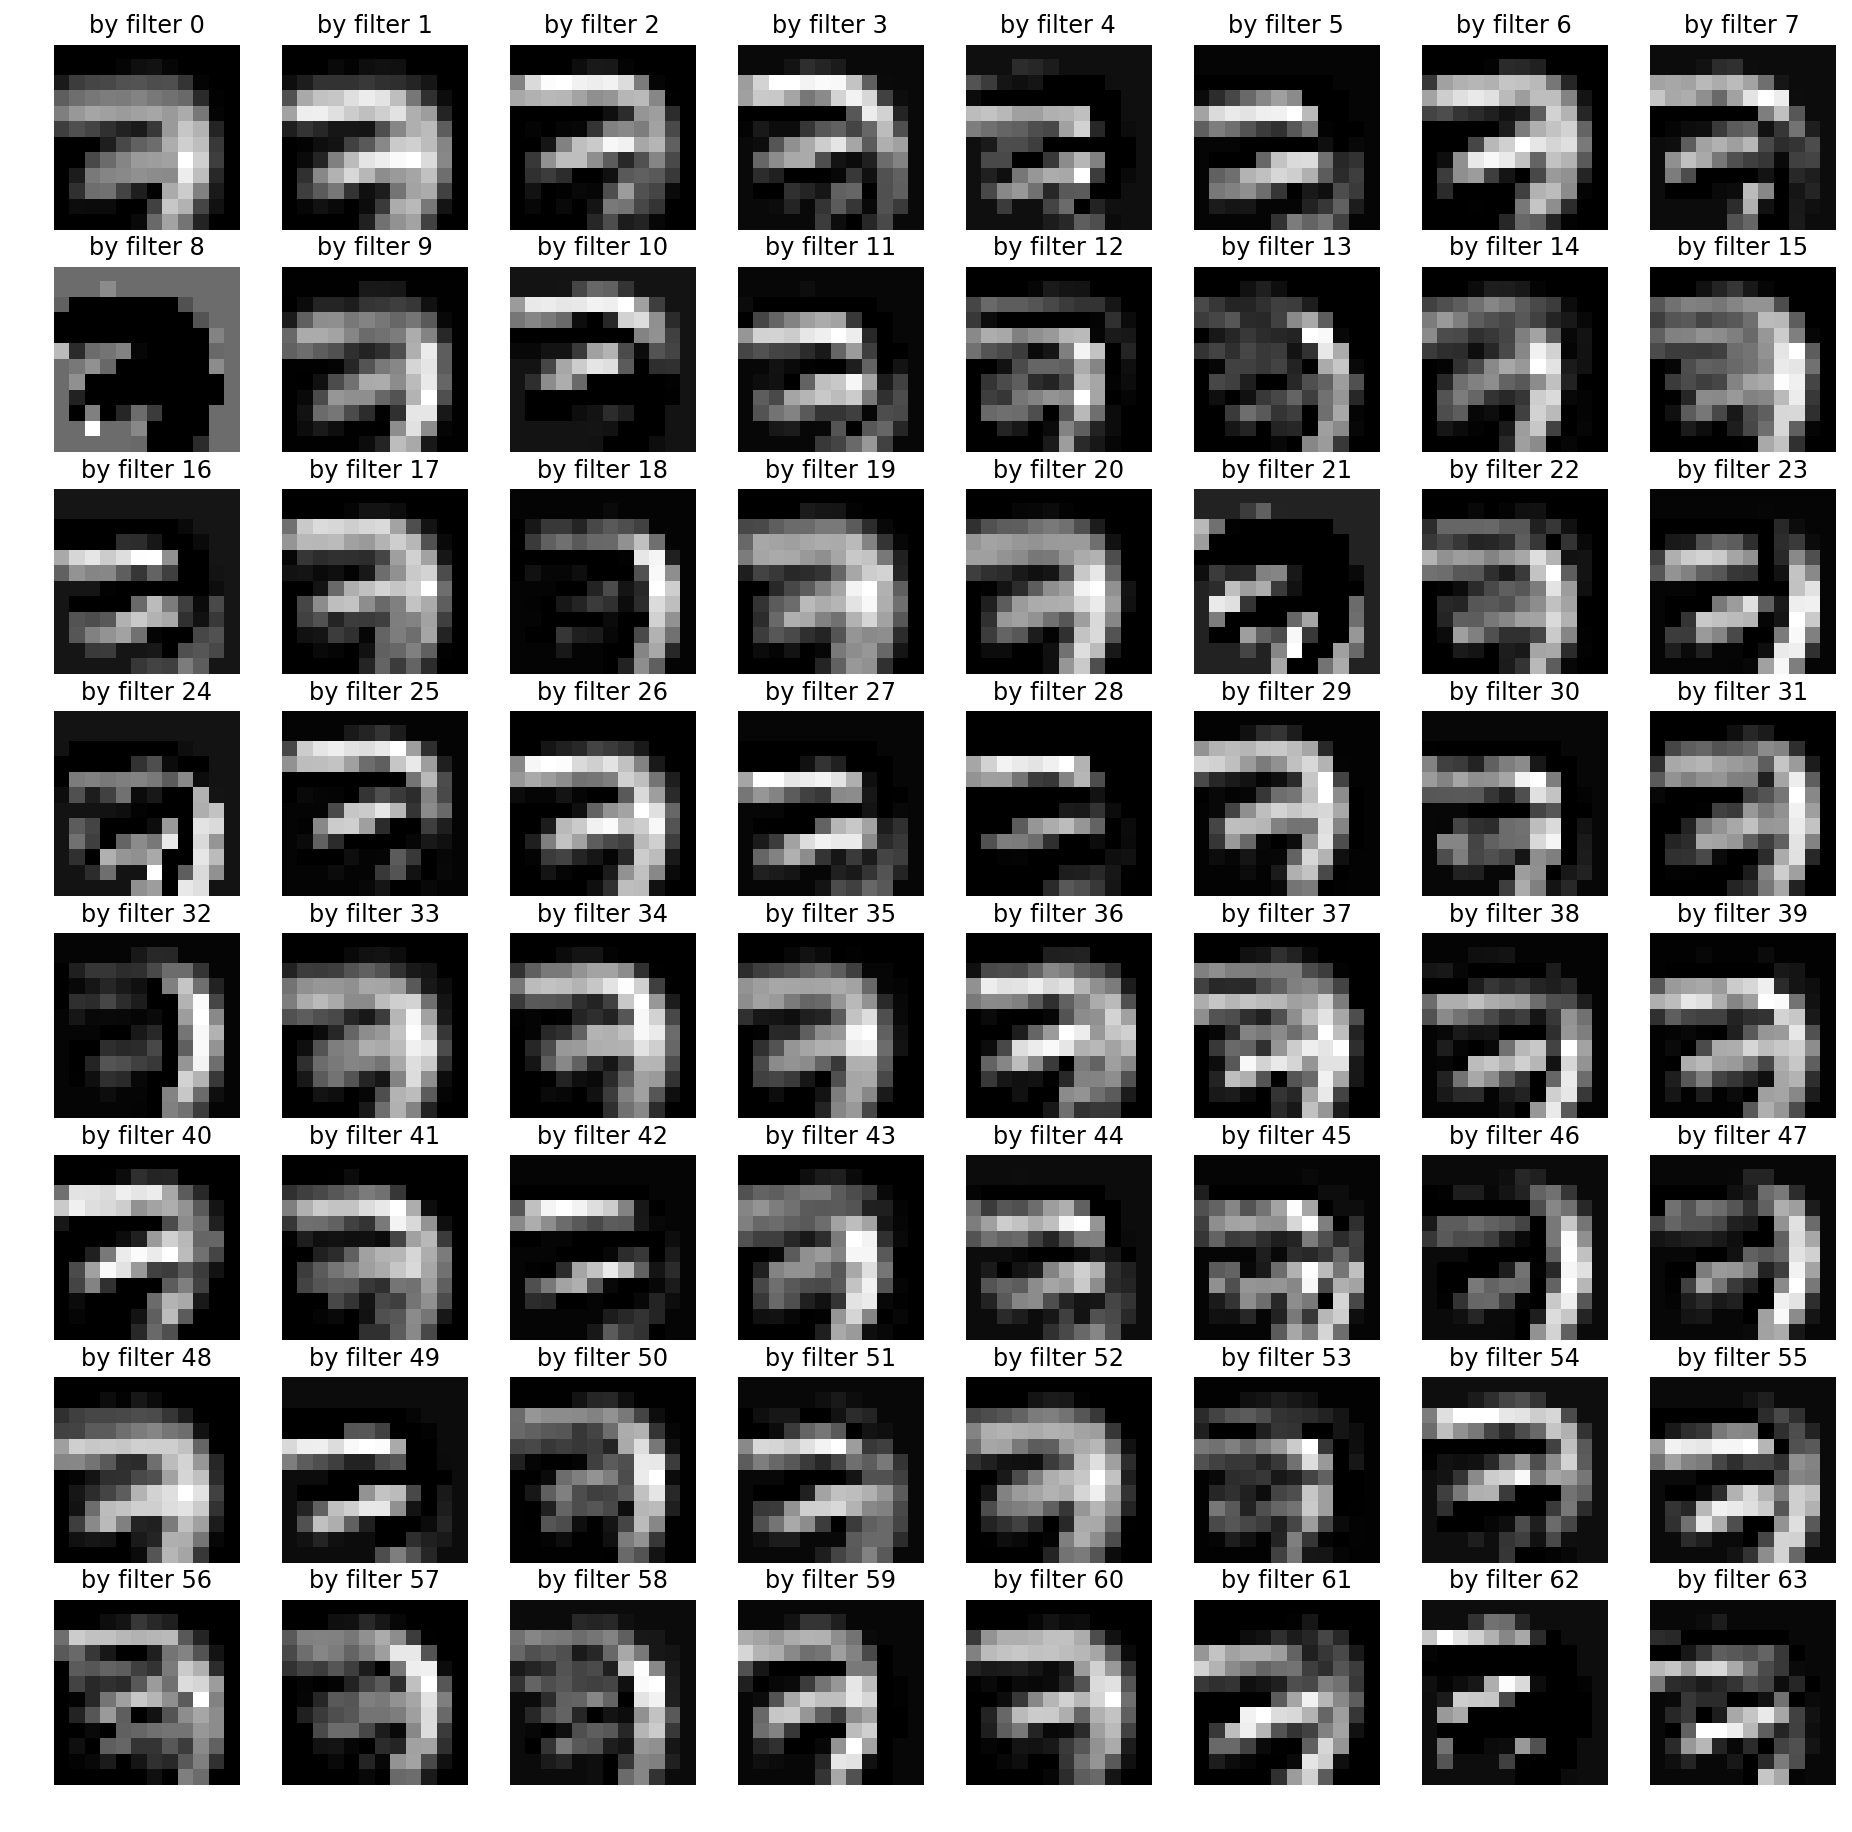


1 0 0.141301 0.9613


KeyboardInterrupt: 

In [11]:
gr = tf.get_default_graph()
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    for step in range(len(mnist.train.images) // batch_size + 1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        if step % 50 == 0:
            curr_loss = sess.run(loss, feed_dict={x:batch_xs, y:batch_ys})
            curr_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
            print(epoch, step, curr_loss, curr_acc)
    # kernels
    first_kerels = gr.get_tensor_by_name('conv2d/kernel:0').eval(session=sess)
    plt.figure(figsize=(16,16))
    for k in range(64):
        img = first_kerels[:, :, 0, k]
        
        img = (img - img.min()) / (img.max() - img.min())
        plt.subplot(8,8,1+k)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title("filter {0}".format(k))
    plt.show()
    # output images
    first_img = sess.run(conv1, feed_dict={x:theimage})
    plt.figure(figsize=(16,16))
    for k in range(64):
        img = first_img[0, :, :, k]
        plt.subplot(8,8,1+k)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title("by filter {0}".format(k))
    plt.show()
    print("")

## Prediction

In [11]:
test_id = 9229
test_image = mnist.test.images[test_id]
test_label = mnist.test.labels[test_id]

out = sess.run(model, feed_dict={x:[test_image]})
print("Predicted Label : {0} (Real Label : {1})".format(np.argmax(out), np.argmax(test_label)))

Predicted Label : 3 (Real Label : 3)


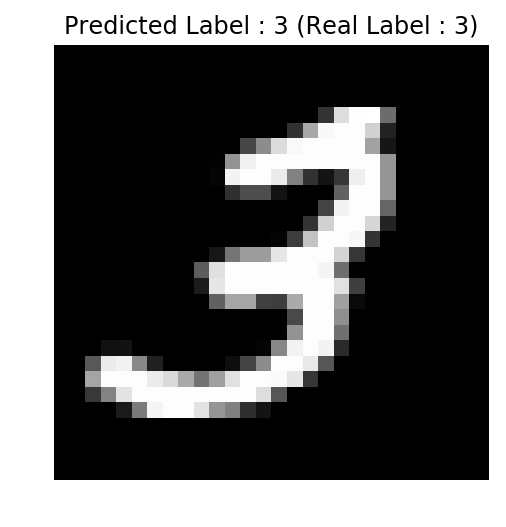

In [12]:
img = test_image.reshape(28,28)
label = np.argmax(test_label)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Predicted Label : {0} (Real Label : {1})".format(np.argmax(out), np.argmax(test_label)))
plt.show()

## SSE
이번엔 아래와 같은 loss function을 사용하여, SGD를 구현해보세요.

$$
E = \sum_{i=1}^m \sum_{k=1}^{10} |\hat{y_i^k}-y_i^k|^2
$$

In [13]:
features = mnist.train.images
labels = mnist.train.labels

x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

model = tf.nn.softmax(tf.matmul(x, W) + b)

y = tf.placeholder(tf.float32, [None, 10])

# TODO12
loss = tf.reduce_sum(tf.reduce_sum(tf.square(model - y),1))

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(model,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

lr = 0.01
batch_size = 128
MaxEpochs = 5
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    for step in range(len(mnist.train.images) // batch_size + 1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        if step % 50 == 0:
            curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict={x:features, y:labels})
            curr_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
            print(epoch, step, curr_loss, curr_acc)
    print("")

0 0 45020.0 0.3515
0 50 9324.59 0.8928
0 100 8070.7 0.9138
0 150 8634.14 0.9018
0 200 7511.65 0.9133
0 250 7243.93 0.9187
0 300 6762.27 0.9217
0 350 7108.57 0.9183
0 400 6698.45 0.9233

1 0 6579.6 0.9203
1 50 6632.31 0.9256
1 100 6492.05 0.9226
1 150 6596.6 0.9218
1 200 6244.63 0.9275
1 250 6239.53 0.9261
1 300 6252.43 0.9272
1 350 6084.0 0.9264
1 400 6467.98 0.924

2 0 6264.15 0.9232
2 50 5996.78 0.9266
2 100 6479.85 0.9209
2 150 5972.01 0.9278
2 200 6028.93 0.9273
2 250 5819.96 0.9288
2 300 5938.29 0.9267
2 350 5819.54 0.93
2 400 5939.76 0.926

3 0 5805.25 0.9285
3 50 5781.2 0.9285
3 100 5940.71 0.9292
3 150 6160.54 0.9251
3 200 5782.15 0.9271
3 250 5876.02 0.9273
3 300 5710.86 0.9297
3 350 5918.28 0.9256
3 400 5690.01 0.929

4 0 5632.25 0.93
4 50 5599.14 0.9301
4 100 5726.31 0.9308
4 150 6001.47 0.9248
4 200 5874.74 0.9249
4 250 5968.84 0.9268
4 300 5720.98 0.9283
4 350 6137.71 0.9219
4 400 5755.17 0.9287

